In [63]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [64]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
metrics_df = pd.read_csv('metrics.csv').drop(columns = ['Unnamed: 0'])
metrics_df

,idx,action,mean_mpjpe_STSGCN,mean_mpjpe_motionmixer,CBLOF_full,CBLOF_Ti_10,CBLOF_To_25,IFOREST_full,IFOREST_Ti_10,IFOREST_To_25,HDBSCAN_full,HDBSCAN_Ti_10,HDBSCAN_To_25,LOF_full,LOF_Ti_10,LOF_To_25
0,0,walking,93.675567,102.448229,6.826516,4.801257,6.284274,-0.071506,-0.103554,-0.061220,0.225378,0.129219,0.096772,1.342149,1.133492,1.298507
1,1,walking,85.310110,94.610764,6.778658,4.784079,6.272123,-0.070384,-0.103796,-0.057540,0.217411,0.125704,0.097167,1.328314,1.136863,1.291393
2,2,walking,83.354780,99.023203,6.705774,4.822663,6.241388,-0.074504,-0.103825,-0.056933,0.205538,0.134777,0.093353,1.309284,1.149762,1.280669
3,3,walking,87.318396,104.901132,6.608236,4.907010,6.178011,-0.071427,-0.100295,-0.057331,0.189529,0.150669,0.082388,1.284328,1.167995,1.262712
4,4,walking,89.802102,107.749316,6.323247,4.981930,6.099157,-0.072563,-0.097557,-0.062177,0.173460,0.165176,0.070758,1.262906,1.181005,1.244329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180072,9270,walkingtogether,37.963082,39.220811,4.280818,5.447292,4.396982,-0.077916,-0.087516,-0.092054,0.346219,0.025580,0.023360,1.041184,1.073231,1.065025
180073,9271,walkingtogether,37.647556,34.372172,4.432358,5.610270,4.265305,-0.079021,-0.081029,-0.095020,0.345278,0.038833,0.004577,1.039324,1.074453,1.061717
180074,9272,walkingtogether,41.737064,32.446786,4.631757,5.733671,4.174752,-0.079837,-0.083097,-0.099845,0.341166,0.044855,0.083452,1.038706,1.072405,1.059400
180075,9273,walkingtogether,39.341552,31.302170,4.869488,5.748328,4.188549,-0.082146,-0.084715,-0.097257,0.336184,0.036809,0.058962,1.038026,1.070272,1.054587


In [20]:
metrics_df.describe()

,idx,mean_mpjpe_STSGCN,mean_mpjpe_motionmixer,CBLOF_full,CBLOF_Ti_10,CBLOF_To_25,IFOREST_full,IFOREST_Ti_10,IFOREST_To_25,LOF_full,LOF_Ti_10,LOF_To_25
count,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000
mean,6546.316392,64.183263,65.870288,6.534092,6.542505,6.533932,-0.057102,-0.063251,-0.061736,1.223144,1.207219,1.212397
std,4313.010187,37.862243,41.318476,1.857268,1.814261,1.863955,0.030945,0.033465,0.032308,0.174492,0.160170,0.171639
min,0.000000,5.313938,1.453907,2.138159,2.360377,1.850109,-0.121536,-0.128590,-0.129450,0.959508,0.966713,0.955791
25%,3001.000000,37.414365,37.192604,5.238948,5.287802,5.277955,-0.079440,-0.087215,-0.084872,1.086513,1.089967,1.082610
50%,6002.000000,56.091917,57.642287,6.289111,6.271243,6.296856,-0.061220,-0.069121,-0.066884,1.187959,1.174755,1.175355
75%,9493.000000,83.000714,86.231217,7.503521,7.471562,7.455195,-0.039466,-0.045696,-0.045085,1.325336,1.294703,1.305716
max,19087.000000,784.550361,784.473801,35.134590,51.689655,39.554085,0.200644,0.208241,0.211007,3.840801,6.071108,4.275867


# Scaling metrics for some visualization 

In [76]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

columns_to_scale = metrics_df.columns.difference(['idx', 'action'])
metrics_df_scaled = metrics_df.copy(deep = True)
scaler = MinMaxScaler()
scaler.fit(metrics_df_scaled[columns_to_scale])
#print(scaler.data_max_)
metrics_df_scaled[columns_to_scale] = scaler.transform(metrics_df_scaled[columns_to_scale])
metrics_df_scaled

,idx,action,mean_mpjpe_STSGCN,mean_mpjpe_motionmixer,CBLOF_full,CBLOF_Ti_10,CBLOF_To_25,IFOREST_full,IFOREST_Ti_10,IFOREST_To_25,HDBSCAN_full,HDBSCAN_Ti_10,HDBSCAN_To_25,LOF_full,LOF_Ti_10,LOF_To_25
0,0,walking,0.113395,0.128981,0.143640,0.050795,0.108468,0.154867,0.073064,0.195522,0.283654,0.152818,0.119833,0.133057,0.032672,0.103337
1,1,walking,0.102660,0.118971,0.142179,0.050447,0.108144,0.158354,0.072354,0.206139,0.273626,0.148661,0.120321,0.128226,0.033332,0.101192
2,2,walking,0.100150,0.124606,0.139953,0.051228,0.107325,0.145552,0.072271,0.207891,0.258683,0.159391,0.115599,0.121580,0.035859,0.097959
3,3,walking,0.105237,0.132113,0.136974,0.052935,0.105634,0.155114,0.082586,0.206741,0.238535,0.178186,0.102020,0.112865,0.039431,0.092545
4,4,walking,0.108424,0.135751,0.128271,0.054451,0.103531,0.151584,0.090589,0.192763,0.218311,0.195342,0.087619,0.105384,0.041980,0.087003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180072,9270,walkingtogether,0.041899,0.048232,0.065898,0.063868,0.058137,0.134949,0.119933,0.106571,0.435740,0.030251,0.028927,0.027953,0.020867,0.032945
180073,9271,walkingtogether,0.041494,0.042040,0.070526,0.067166,0.054625,0.131516,0.138891,0.098015,0.434555,0.045926,0.005667,0.027303,0.021106,0.031948
180074,9272,walkingtogether,0.046742,0.039581,0.076615,0.069663,0.052210,0.128980,0.132848,0.084096,0.429380,0.053047,0.103338,0.027087,0.020705,0.031249
180075,9273,walkingtogether,0.043668,0.038119,0.083875,0.069959,0.052578,0.121808,0.128120,0.091564,0.423109,0.043532,0.073013,0.026850,0.020287,0.029798


In [19]:
metrics_df_scaled.describe()

,idx,mean_mpjpe_STSGCN,mean_mpjpe_motionmixer,CBLOF_full,CBLOF_Ti_10,CBLOF_To_25,IFOREST_full,IFOREST_Ti_10,IFOREST_To_25,LOF_full,LOF_Ti_10,LOF_To_25
count,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000
mean,6546.316392,0.075547,0.082267,0.133225,0.084780,0.124226,0.199994,0.193982,0.198890,0.091499,0.047117,0.077289
std,4313.010187,0.048589,0.052768,0.056287,0.036779,0.049437,0.096049,0.099352,0.094896,0.060560,0.031379,0.051697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3001.000000,0.041195,0.045642,0.093973,0.059345,0.090915,0.130660,0.122836,0.130936,0.044079,0.024147,0.038197
50%,6002.000000,0.065164,0.071759,0.125800,0.079281,0.117938,0.187210,0.176553,0.183771,0.079288,0.040757,0.066132
75%,9493.000000,0.099696,0.108270,0.162604,0.103614,0.148660,0.254733,0.246098,0.247797,0.126966,0.064256,0.105397
max,19087.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Distribution plotting 

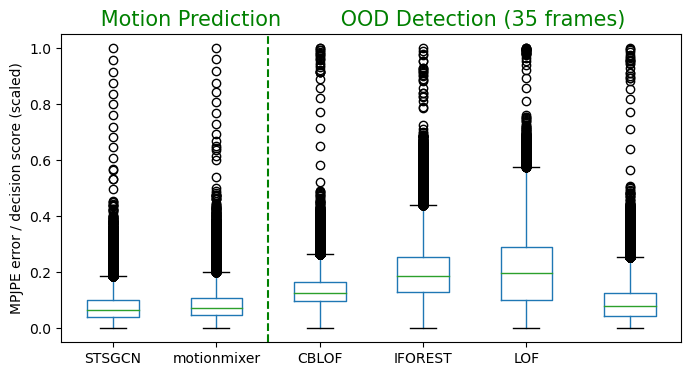

In [77]:
ax = metrics_df_scaled.boxplot(column = [column for column in metrics_df_scaled.columns\
                                    if ('full' in column) or ('mean' in column)],
                         figsize = (8,4), grid=False,  fontsize=10,
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )
plt.axvline(x = 2.5, color = 'g',  linestyle="--")

#plt.xlabel('Motion Prediction                                        OOD') 
plt.ylabel('MPJPE error / decision score (scaled)') 

plt.title("      Motion Prediction         OOD Detection (35 frames)", fontsize=15,
          color="green", loc="left",
          #fontstyle='italic'
         )

plt.xticks([1,2,3,4,5], ['STSGCN', 'motionmixer', 'CBLOF', 'IFOREST', 'LOF'])
plt.savefig('fig/boxplot_MPvsOOD_full.png')

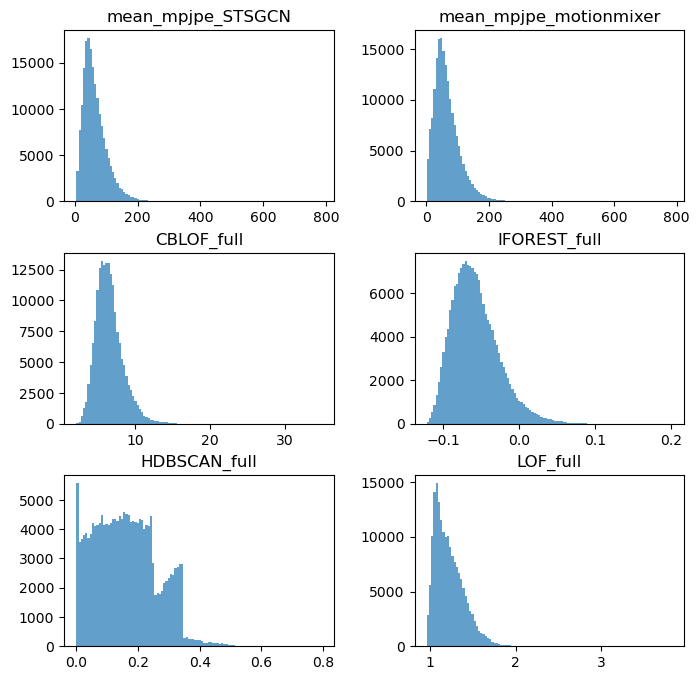

In [125]:

ax = metrics_df[[column for column in metrics_df_scaled.columns  if \
                                 ('full'in column)    #('LOF_full' in column) 
                                 or
                        ('mean' in column)
                       ]].hist( 
                         figsize = (8,8), grid=False,  bins=110, alpha=0.7
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )
#plt.axvline(x = 0.2, color = 'g',  linestyle="--")
#plt.axvline(x = 0.3, color = 'r',  linestyle="--")


#plt.xlabel('MPJPE error / decision score') 
#plt.ylabel('f') 

#plt.title("Metrics Distribution  (35 Frames)", fontsize=15,
 #         color="green",
          #loc="left",
          #fontstyle='italic'
  #       )

#plt.xticks([1,2,3,4,5], ['STSGCN', 'motionmixer', 'CBLOF', 'IFOREST', 'LOF'])
plt.savefig('fig/hist_ALL_full.png')
#ax.set(xlim=(0, 0.5)) #, ylim=(-3, 5)
plt.show()


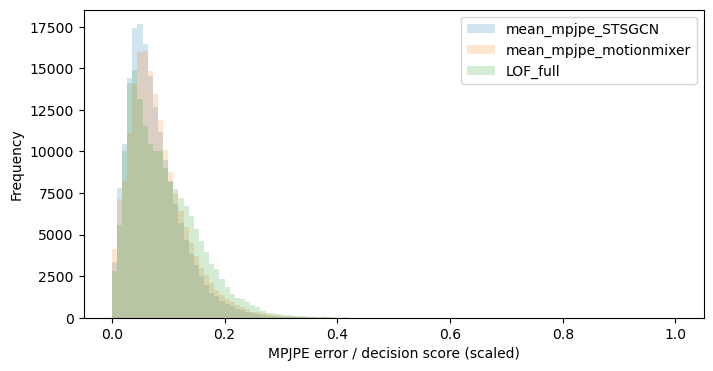

In [85]:

ax = metrics_df_scaled[[column for column in metrics_df_scaled.columns  if \
                                 ('LOF_full' == column)    #('LOF_full' in column) 
                                 or
                        ('mean' in column)
                       ]].plot.hist( 
                         figsize = (8,4), grid=False,  fontsize=10, bins=110, alpha=0.2
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )
#plt.axvline(x = 0.2, color = 'g',  linestyle="--")
#plt.axvline(x = 0.3, color = 'r',  linestyle="--")


plt.xlabel('MPJPE error / decision score (scaled)') 
#plt.ylabel('f') 

#plt.title(" ", fontsize=15,
#          color="green", loc="left",
          #fontstyle='italic')

#plt.xticks([1,2,3,4,5], ['STSGCN', 'motionmixer', 'CBLOF', 'IFOREST', 'LOF'])
plt.savefig('fig/hist_MPvsLOF_full.png')
#ax.set(xlim=(0, 0.5)) #, ylim=(-3, 5)
plt.show()


In [86]:
metrics_df.columns

Index(['idx', 'action', 'mean_mpjpe_STSGCN', 'mean_mpjpe_motionmixer',
       'CBLOF_full', 'CBLOF_Ti_10', 'CBLOF_To_25', 'IFOREST_full',
       'IFOREST_Ti_10', 'IFOREST_To_25', 'HDBSCAN_full', 'HDBSCAN_Ti_10',
       'HDBSCAN_To_25', 'LOF_full', 'LOF_Ti_10', 'LOF_To_25'],
      dtype='object')

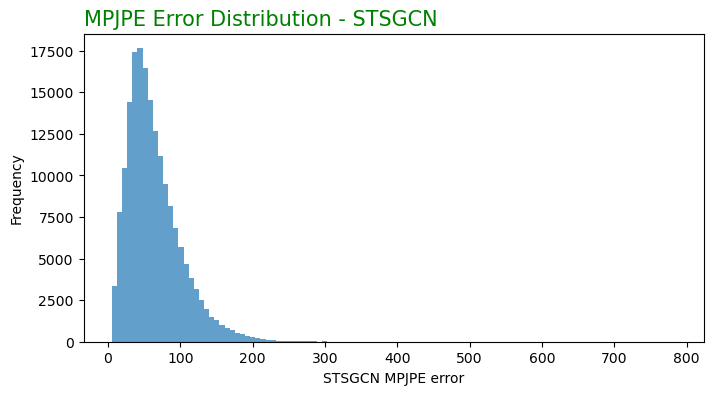

In [100]:

ax = metrics_df['mean_mpjpe_STSGCN'].plot.hist( 
                         figsize = (8,4), grid=False,  fontsize=10, bins=110, alpha=0.7
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )
#plt.axvline(x = 0.2, color = 'g',  linestyle="--")
#plt.axvline(x = 0.3, color = 'r',  linestyle="--")


plt.xlabel('STSGCN MPJPE error') 
#plt.ylabel('f') 

plt.title("MPJPE Error Distribution - STSGCN ", fontsize=15,
          color="green", loc="left",
          #fontstyle='italic'
         )

#plt.xticks([1,2,3,4,5], ['STSGCN', 'motionmixer', 'CBLOF', 'IFOREST', 'LOF'])
plt.savefig('fig/hist_STSGCNmpjpe.png')
#ax.set(xlim=(0, 0.5)) #, ylim=(-3, 5)
plt.show()


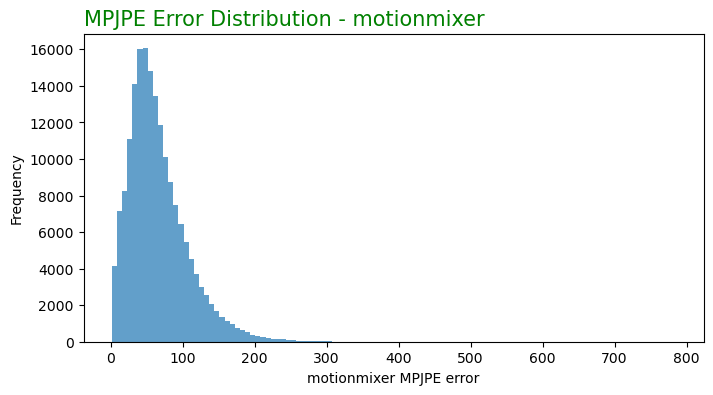

In [102]:

ax = metrics_df['mean_mpjpe_motionmixer'].plot.hist( 
                         figsize = (8,4), grid=False,  fontsize=10, bins=110, alpha=0.7
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )
#plt.axvline(x = 0.2, color = 'g',  linestyle="--")
#plt.axvline(x = 0.3, color = 'r',  linestyle="--")


plt.xlabel('motionmixer MPJPE error') 
#plt.ylabel('f') 

plt.title("MPJPE Error Distribution - motionmixer", fontsize=15,
          color="green", loc="left",
          #fontstyle='italic'
         )

#plt.xticks([1,2,3,4,5], ['STSGCN', 'motionmixer', 'CBLOF', 'IFOREST', 'LOF'])
plt.savefig('fig/hist_motionmixermpjpe.png')
#ax.set(xlim=(0, 0.5)) #, ylim=(-3, 5)
plt.show()


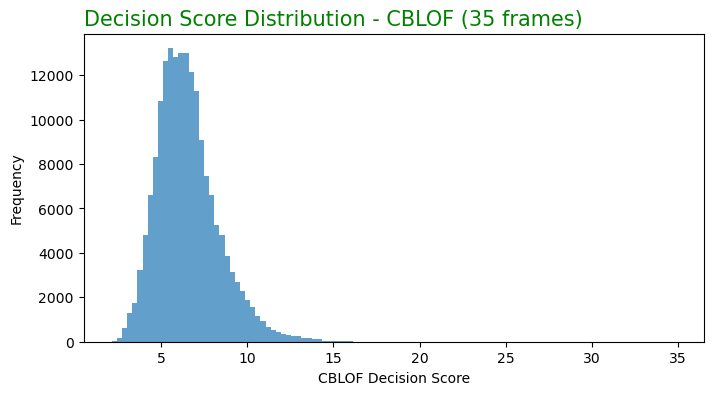

In [106]:

ax = metrics_df['CBLOF_full'].plot.hist( 
                         figsize = (8,4), grid=False,  fontsize=10, bins=110, alpha=0.7
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )
#plt.axvline(x = 0.2, color = 'g',  linestyle="--")
#plt.axvline(x = 0.3, color = 'r',  linestyle="--")


plt.xlabel('CBLOF Decision Score') 
#plt.ylabel('f') 

plt.title("Decision Score Distribution - CBLOF (35 frames) ", fontsize=15,
          color="green", loc="left",
          #fontstyle='italic'
         )

#plt.xticks([1,2,3,4,5], ['STSGCN', 'motionmixer', 'CBLOF', 'IFOREST', 'LOF'])
plt.savefig('fig/hist_CBLOF_full.png')
#ax.set(xlim=(0, 0.5)) #, ylim=(-3, 5)
plt.show()


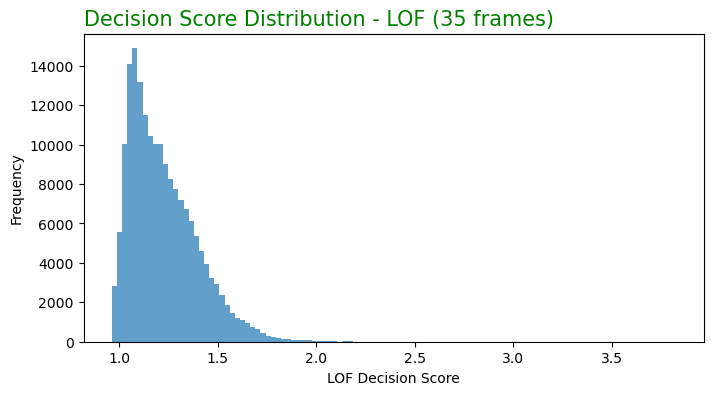

In [104]:

ax = metrics_df['LOF_full'].plot.hist( 
                         figsize = (8,4), grid=False,  fontsize=10, bins=110, alpha=0.7
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )
#plt.axvline(x = 0.2, color = 'g',  linestyle="--")
#plt.axvline(x = 0.3, color = 'r',  linestyle="--")


plt.xlabel('LOF Decision Score') 
#plt.ylabel('f') 

plt.title("Decision Score Distribution - LOF (35 frames) ", fontsize=15,
          color="green", loc="left",
          #fontstyle='italic'
         )

#plt.xticks([1,2,3,4,5], ['STSGCN', 'motionmixer', 'CBLOF', 'IFOREST', 'LOF'])
plt.savefig('fig/hist_LOF_full.png')
#ax.set(xlim=(0, 0.5)) #, ylim=(-3, 5)
plt.show()


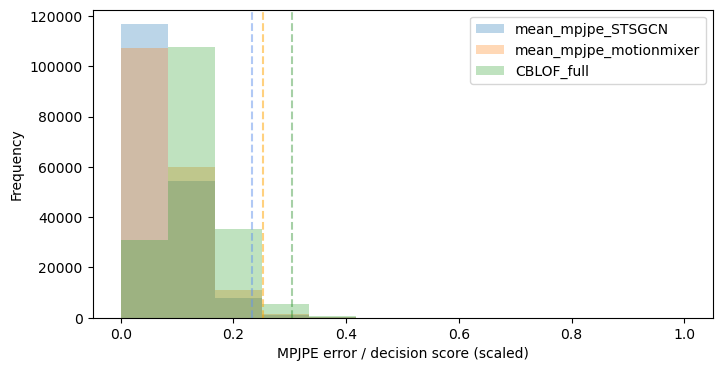

<Figure size 640x480 with 0 Axes>

In [323]:
QG= metrics_df_scaled.mean_mpjpe_STSGCN.quantile(0.99)
QM= metrics_df_scaled.mean_mpjpe_motionmixer.quantile(0.99)
QCBLOF= metrics_df_scaled.CBLOF_full.quantile(0.99)

ax = metrics_df_scaled[[column for column in metrics_df_scaled.columns  if \
                                 ('CBLOF_full' == column)    #('LOF_full' in column) 
                                 or
                        ('mean' in column)
                       ]].plot.hist(
                         figsize = (8,4), grid=False,  fontsize=10, bins=12, alpha=0.3
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )
plt.axvline(x = QG, color = 'cornflowerblue',  linestyle="--",alpha = 0.5)
plt.axvline(x = QCBLOF, color = 'forestgreen',  linestyle="--", alpha = 0.4)
plt.axvline(x = QM, color = 'orange',  linestyle="--", alpha = 0.5)

plt.xlabel('MPJPE error / decision score (scaled)') 
#plt.ylabel('f') 

#plt.title("      Motion Prediction         OOD Detection (35 frames)", fontsize=15,
#          color="green", loc="left",
          #fontstyle='italic')

#plt.xticks([1,2,3,4,5], ['STSGCN', 'motionmixer', 'CBLOF', 'IFOREST', 'LOF'])
plt.legend() #fontsize=14
plt.show()
plt.savefig('fig/hist_MPvsCLOF_full.png')

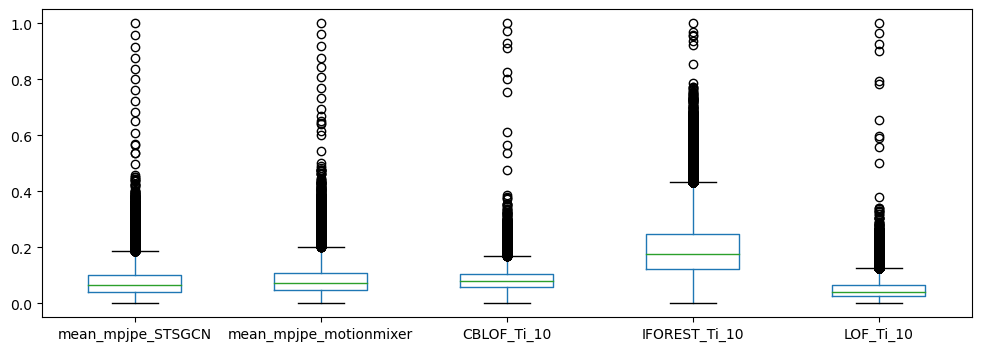

In [52]:
metrics_df_scaled.boxplot(column = [column for column in metrics_df_scaled.columns\
                                    if ('Ti_10' in column) or ('mean' in column)],
                         figsize = (12,), grid=False,  fontsize=10,
                         # rot=45,
                         );

# Comparing metrics - Scatter plots 

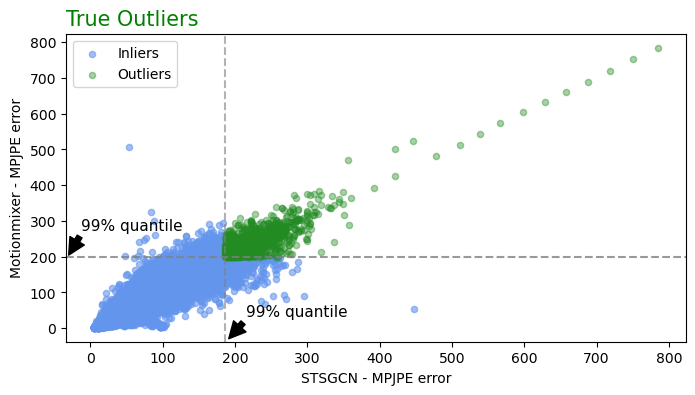

In [330]:
fig, ax = plt.subplots()

et = 0.99
QG= metrics_df.mean_mpjpe_STSGCN.quantile(et)
QM= metrics_df.mean_mpjpe_motionmixer.quantile(et)

plt.axvline(x = QG, color = 'grey',  linestyle="--", alpha=0.6)
plt.axhline(y = QM, color = 'grey',  linestyle="--", alpha=0.8)

ax.annotate(f'{int(et*100)}% quantile',
            xy=(QG+5, -30),
            xycoords='data',
            xytext=(0.25+(et-0.97)*2, 0.12), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='top', fontsize=11
           )

ax.annotate(f'{int(et*100)}% quantile',
            xy=(-30, QM+5),
            xycoords='data',
            xytext=(0.025, 0.36+(et-0.97)*2), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='top', fontsize=11
           )


#plt.axhspan(i, i+.2, facecolor='0.2', alpha=0.5)
#ax.axvline(x=QG+(830-QG)/2, ymin=QM, linewidth=(840-QG)/2, color='g',  alpha=0.05)

metrics_df[(metrics_df.mean_mpjpe_STSGCN<QG)|(metrics_df.mean_mpjpe_motionmixer<QM)]\
            .plot.scatter( x = 'mean_mpjpe_STSGCN', y = 'mean_mpjpe_motionmixer', c= 'cornflowerblue',
                         figsize = (8,4), grid=False,  fontsize=10, ax = ax,  alpha=0.6, label ='Inliers'
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )
metrics_df[(metrics_df.mean_mpjpe_STSGCN>=QG)&(metrics_df.mean_mpjpe_motionmixer>=QM)]\
            .plot.scatter( x = 'mean_mpjpe_STSGCN', y = 'mean_mpjpe_motionmixer', c= 'forestgreen',
                         figsize = (8,4), grid=False,  fontsize=10, ax = ax,  alpha=0.4,label ='Outliers'
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )


plt.xlabel('STSGCN - MPJPE error') 
plt.ylabel('Motionmixer - MPJPE error') 

plt.title("True Outliers", fontsize=15,
          color="green", loc="left",
          #fontstyle='italic'
         )

plt.savefig('fig/sc_outliers_motion.png')

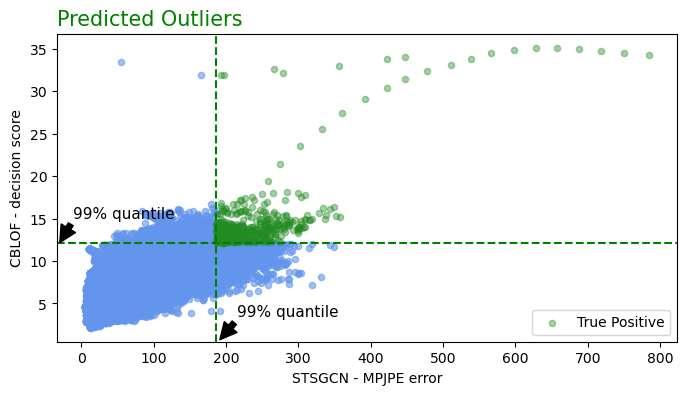

In [331]:
fig, ax = plt.subplots()
mt = 0.99
et = 0.99
QG= metrics_df.mean_mpjpe_STSGCN.quantile(et)
QCBLOF= metrics_df.CBLOF_full.quantile(mt)

plt.axvline(x = QG, color = 'g',  linestyle="--")
plt.axhline(y = QCBLOF, color = 'g',  linestyle="--")

ax.annotate(f'{int(et*100)}% quantile',
            xy=(QG+5, 0.7),
            xycoords='data',
            xytext=(0.25+(et-0.97)*2, 0.12), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='top', fontsize=11
           )

ax.annotate(f'{int(mt*100)}% quantile',
            xy=(-30, QCBLOF),
            xycoords='data',
            xytext=(0.025, 0.4+(mt-0.97)*2), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='top', fontsize=11
           )


#plt.axhspan(i, i+.2, facecolor='0.2', alpha=0.5)
#ax.axvline(x=QG+(830-QG)/2, ymin=QM, linewidth=(840-QG)/2, color='g',  alpha=0.05)

metrics_df[(metrics_df.mean_mpjpe_STSGCN<QG)|(metrics_df.CBLOF_full<QCBLOF)]\
            .plot.scatter( x = 'mean_mpjpe_STSGCN', y = 'CBLOF_full', c= 'cornflowerblue',
                         figsize = (8,4), grid=False,  fontsize=10, ax = ax,  alpha=0.6
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )
metrics_df[(metrics_df.mean_mpjpe_STSGCN>=QG)&(metrics_df.CBLOF_full>=QCBLOF)]\
            .plot.scatter( x = 'mean_mpjpe_STSGCN', y = 'CBLOF_full', c= 'forestgreen',
                         figsize = (8,4), grid=False,  fontsize=10, ax = ax,  alpha=0.4,label = 'True Positive'
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )


plt.xlabel('STSGCN - MPJPE error') 
plt.ylabel('CBLOF - decision score') 

plt.title("Predicted Outliers", fontsize=15,
          color="green", loc="left",
          #fontstyle='italic'
         )

plt.savefig('fig/sc_outliers_CBLOFvsmotion99.png')

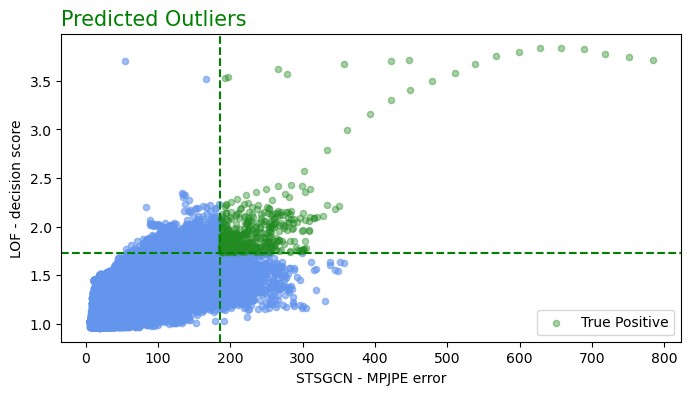

In [332]:
fig, ax = plt.subplots()
mt = 0.99
et = 0.99
QG= metrics_df.mean_mpjpe_STSGCN.quantile(et)
QLOF= metrics_df.LOF_full.quantile(mt)

plt.axvline(x = QG, color = 'g',  linestyle="--")
plt.axhline(y = QLOF, color = 'g',  linestyle="--")

ax.annotate(f'{int(et*100)}% quantile',
            xy=(QG+5, 0.7),
            xycoords='data',
            xytext=(0.25+(et-0.97)*2, 0.12), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='top', fontsize=11
           )

ax.annotate(f'{int(mt*100)}% quantile',
            xy=(-30, QCBLOF),
            xycoords='data',
            xytext=(0.025, 0.4+(mt-0.97)*2), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='top', fontsize=11
           )


#plt.axhspan(i, i+.2, facecolor='0.2', alpha=0.5)
#ax.axvline(x=QG+(830-QG)/2, ymin=QM, linewidth=(840-QG)/2, color='g',  alpha=0.05)

metrics_df[(metrics_df.mean_mpjpe_STSGCN<QG)|(metrics_df.LOF_full<QLOF)]\
            .plot.scatter( x = 'mean_mpjpe_STSGCN', y = 'LOF_full', c= 'cornflowerblue',
                         figsize = (8,4), grid=False,  fontsize=10, ax = ax,  alpha=0.6
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )
metrics_df[(metrics_df.mean_mpjpe_STSGCN>=QG)&(metrics_df.LOF_full>=QLOF)]\
            .plot.scatter( x = 'mean_mpjpe_STSGCN', y = 'LOF_full', c= 'forestgreen',
                         figsize = (8,4), grid=False,  fontsize=10, ax = ax,  alpha=0.4, label = 'True Positive'
                         # rot=45,
                         #backend = 'matplotlib' #plotly
                              )


plt.xlabel('STSGCN - MPJPE error') 
plt.ylabel('LOF - decision score') 

plt.title("Predicted Outliers", fontsize=15,
          color="green", loc="left",
          #fontstyle='italic'
         )

plt.savefig('fig/sc_outliers_LOFvsmotion99.png')

# Main Scatter plot (OOD via all models)

In [126]:
metrics_df['min_mean_mpjpe'] =\
metrics_df[[column for column in metrics_df.columns if 'mean_mpjpe' in column ]]\
.apply(lambda row: np.min(row), 1)
metrics_df

,idx,action,mean_mpjpe_STSGCN,mean_mpjpe_motionmixer,CBLOF_full,CBLOF_Ti_10,CBLOF_To_25,IFOREST_full,IFOREST_Ti_10,IFOREST_To_25,HDBSCAN_full,HDBSCAN_Ti_10,HDBSCAN_To_25,LOF_full,LOF_Ti_10,LOF_To_25,min_mean_mpjpe
0,0,walking,93.675567,102.448229,6.826516,4.801257,6.284274,-0.071506,-0.103554,-0.061220,0.225378,0.129219,0.096772,1.342149,1.133492,1.298507,93.675567
1,1,walking,85.310110,94.610764,6.778658,4.784079,6.272123,-0.070384,-0.103796,-0.057540,0.217411,0.125704,0.097167,1.328314,1.136863,1.291393,85.310110
2,2,walking,83.354780,99.023203,6.705774,4.822663,6.241388,-0.074504,-0.103825,-0.056933,0.205538,0.134777,0.093353,1.309284,1.149762,1.280669,83.354780
3,3,walking,87.318396,104.901132,6.608236,4.907010,6.178011,-0.071427,-0.100295,-0.057331,0.189529,0.150669,0.082388,1.284328,1.167995,1.262712,87.318396
4,4,walking,89.802102,107.749316,6.323247,4.981930,6.099157,-0.072563,-0.097557,-0.062177,0.173460,0.165176,0.070758,1.262906,1.181005,1.244329,89.802102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180072,9270,walkingtogether,37.963082,39.220811,4.280818,5.447292,4.396982,-0.077916,-0.087516,-0.092054,0.346219,0.025580,0.023360,1.041184,1.073231,1.065025,37.963082
180073,9271,walkingtogether,37.647556,34.372172,4.432358,5.610270,4.265305,-0.079021,-0.081029,-0.095020,0.345278,0.038833,0.004577,1.039324,1.074453,1.061717,34.372172
180074,9272,walkingtogether,41.737064,32.446786,4.631757,5.733671,4.174752,-0.079837,-0.083097,-0.099845,0.341166,0.044855,0.083452,1.038706,1.072405,1.059400,32.446786
180075,9273,walkingtogether,39.341552,31.302170,4.869488,5.748328,4.188549,-0.082146,-0.084715,-0.097257,0.336184,0.036809,0.058962,1.038026,1.070272,1.054587,31.302170


## Use a threshold of 0.9 on all OOD models to get predictions (for 35 frames)

In [127]:
Q = 0.9
full_columns = [column for column in metrics_df.columns if 'full' in column ]
def fn_Q(metrics_df, full_columns):
    t= []
    for c in full_columns:
        t.append(metrics_df[c].quantile(Q))
    return t 
quantiles = fn_Q(metrics_df, full_columns)
i =0 
for c in full_columns:
    metrics_df[f'pred_outliers_{c}'] = [1 if x > quantiles[i] else 0 for x in metrics_df[c].values ]
    i+=1  

In [128]:
metrics_df['predicted_outliers'] = metrics_df[[column for column in metrics_df.columns if 'pred_outliers' in column]]\
.apply(lambda row : np.min(row) ,1)
metrics_df

,idx,action,mean_mpjpe_STSGCN,mean_mpjpe_motionmixer,CBLOF_full,CBLOF_Ti_10,CBLOF_To_25,IFOREST_full,IFOREST_Ti_10,IFOREST_To_25,...,HDBSCAN_To_25,LOF_full,LOF_Ti_10,LOF_To_25,min_mean_mpjpe,pred_outliers_CBLOF_full,pred_outliers_IFOREST_full,pred_outliers_HDBSCAN_full,pred_outliers_LOF_full,predicted_outliers
0,0,walking,93.675567,102.448229,6.826516,4.801257,6.284274,-0.071506,-0.103554,-0.061220,...,0.096772,1.342149,1.133492,1.298507,93.675567,0,0,0,0,0
1,1,walking,85.310110,94.610764,6.778658,4.784079,6.272123,-0.070384,-0.103796,-0.057540,...,0.097167,1.328314,1.136863,1.291393,85.310110,0,0,0,0,0
2,2,walking,83.354780,99.023203,6.705774,4.822663,6.241388,-0.074504,-0.103825,-0.056933,...,0.093353,1.309284,1.149762,1.280669,83.354780,0,0,0,0,0
3,3,walking,87.318396,104.901132,6.608236,4.907010,6.178011,-0.071427,-0.100295,-0.057331,...,0.082388,1.284328,1.167995,1.262712,87.318396,0,0,0,0,0
4,4,walking,89.802102,107.749316,6.323247,4.981930,6.099157,-0.072563,-0.097557,-0.062177,...,0.070758,1.262906,1.181005,1.244329,89.802102,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180072,9270,walkingtogether,37.963082,39.220811,4.280818,5.447292,4.396982,-0.077916,-0.087516,-0.092054,...,0.023360,1.041184,1.073231,1.065025,37.963082,0,0,1,0,0
180073,9271,walkingtogether,37.647556,34.372172,4.432358,5.610270,4.265305,-0.079021,-0.081029,-0.095020,...,0.004577,1.039324,1.074453,1.061717,34.372172,0,0,1,0,0
180074,9272,walkingtogether,41.737064,32.446786,4.631757,5.733671,4.174752,-0.079837,-0.083097,-0.099845,...,0.083452,1.038706,1.072405,1.059400,32.446786,0,0,1,0,0
180075,9273,walkingtogether,39.341552,31.302170,4.869488,5.748328,4.188549,-0.082146,-0.084715,-0.097257,...,0.058962,1.038026,1.070272,1.054587,31.302170,0,0,1,0,0


In [129]:
metrics_df['predicted_outliers'].value_counts()

predicted_outliers
0    174848
1      5229
Name: count, dtype: int64

In [130]:
5229/180077 # a 0.9 threshold give us 2.9% 

0.029037578369253154

## upload the tsne projections to

In [131]:
df_tsne = pd.read_csv('df_tsne.csv').loc[:,['0','1']+['idx','action']]
df_tsne

,0,1,idx,action
0,-1.491875,-108.968216,0,walking
1,-1.542240,-108.997650,1,walking
2,-1.600920,-109.033640,2,walking
3,-1.678499,-109.072540,3,walking
4,-1.787714,-109.122210,4,walking
...,...,...,...,...
180072,-67.498130,-76.802600,9270,walkingtogether
180073,-67.102540,-76.509630,9271,walkingtogether
180074,-66.749420,-76.127110,9272,walkingtogether
180075,-66.459190,-75.689150,9273,walkingtogether


In [132]:
df_tsne_metrics = df_tsne.merge(metrics_df,\
                   how='inner', on=['idx','action'])
df_tsne_metrics

,0,1,idx,action,mean_mpjpe_STSGCN,mean_mpjpe_motionmixer,CBLOF_full,CBLOF_Ti_10,CBLOF_To_25,IFOREST_full,...,HDBSCAN_To_25,LOF_full,LOF_Ti_10,LOF_To_25,min_mean_mpjpe,pred_outliers_CBLOF_full,pred_outliers_IFOREST_full,pred_outliers_HDBSCAN_full,pred_outliers_LOF_full,predicted_outliers
0,-1.491875,-108.968216,0,walking,93.675567,102.448229,6.826516,4.801257,6.284274,-0.071506,...,0.096772,1.342149,1.133492,1.298507,93.675567,0,0,0,0,0
1,-1.542240,-108.997650,1,walking,85.310110,94.610764,6.778658,4.784079,6.272123,-0.070384,...,0.097167,1.328314,1.136863,1.291393,85.310110,0,0,0,0,0
2,-1.600920,-109.033640,2,walking,83.354780,99.023203,6.705774,4.822663,6.241388,-0.074504,...,0.093353,1.309284,1.149762,1.280669,83.354780,0,0,0,0,0
3,-1.678499,-109.072540,3,walking,87.318396,104.901132,6.608236,4.907010,6.178011,-0.071427,...,0.082388,1.284328,1.167995,1.262712,87.318396,0,0,0,0,0
4,-1.787714,-109.122210,4,walking,89.802102,107.749316,6.323247,4.981930,6.099157,-0.072563,...,0.070758,1.262906,1.181005,1.244329,89.802102,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180072,-67.498130,-76.802600,9270,walkingtogether,37.963082,39.220811,4.280818,5.447292,4.396982,-0.077916,...,0.023360,1.041184,1.073231,1.065025,37.963082,0,0,1,0,0
180073,-67.102540,-76.509630,9271,walkingtogether,37.647556,34.372172,4.432358,5.610270,4.265305,-0.079021,...,0.004577,1.039324,1.074453,1.061717,34.372172,0,0,1,0,0
180074,-66.749420,-76.127110,9272,walkingtogether,41.737064,32.446786,4.631757,5.733671,4.174752,-0.079837,...,0.083452,1.038706,1.072405,1.059400,32.446786,0,0,1,0,0
180075,-66.459190,-75.689150,9273,walkingtogether,39.341552,31.302170,4.869488,5.748328,4.188549,-0.082146,...,0.058962,1.038026,1.070272,1.054587,31.302170,0,0,1,0,0


In [135]:

def create_plotly_OOD_tsne(df,model, title,  colors_column_name = 'action', error_column_name = 'mean_mpjpe', outlier_column_name= 'outlier_CBLOF'):
    df_ = df.copy(deep = True)
    fig4 = go.Figure()
    for i in df_[colors_column_name].unique():
        ds_aux = df_[df_[colors_column_name]==i]
        fig4.add_traces(
        go.Scatter(
                x=ds_aux.loc[:,'0'], y=ds_aux.loc[:,'1'],
                mode="markers",
                name=str(i),
                marker={"size": (ds_aux[error_column_name]#/ds_aux['mean_mpjpe'].max())**2
                        ),
                        "sizeref": (ds_aux[error_column_name].max())**2/9000,
                        "sizemode": "area",'symbol':ds_aux[outlier_column_name] },
                 #symbol #"sizeref": ds_aux['mean_mpjpe'].max()/40
                #"size": ds_aux['outlier_CBLOF']+0.1,"sizeref": 1/90,  "sizemode": "area" 
                text = ds_aux['idx'],
                hovertemplate="<b> idx: %{text}</b><br><br>" 
               #+"text: %{y:$,.0f}<br>" +
               #"text: %{x:.1f}<br>" +
               +"outlier: %{marker.symbol:,}<br>"
            +"MPJPE: %{marker.size:.1f}<br>" # (normalized)
               #f"{colors_column_name}: {i}" 
            #f"<extra>{ds_aux[ds_aux['idx']==%{text:,}]['action'].values}</extra>", #[ds_aux['idx']==text]
                )
        )
    if model == '':
        fig4.update_layout(
        title={"text": f"{title}", "font": {"size": 24}},
        xaxis={"title": {"text": "Proj. 1", "font": {"size": 16}}},
        yaxis={"title": {"text": "Proj. 2", "font": {"size": 16}}},
        )
    else:  
        fig4.update_layout(
            title={"text": f"OOD detection via  {model}", "font": {"size": 24}},
            xaxis={"title": {"text": "Proj. 1", "font": {"size": 16}}},
            yaxis={"title": {"text": "Proj. 2", "font": {"size": 16}}},
        )
        
     #fig4.update_yaxes(type="log")   
    fig4.update_layout(   #autosize=True
    height=600,
    width = 800
    )
    fig4.show()
    fig4.write_image("fig/fig1.png")
    fig4.write_html("fig/file.html")

In [136]:
def create_df_subset(df_vr, n = 1000, rs = 42):
    df_subset = pd.DataFrame()
    for action in df_vr.action.unique():
        df_subset= pd.concat([df_subset, df_vr[df_vr.action == action].sample(n=n, random_state=rs)])
    return df_subset

In [134]:
df_tsne_metrics['predicted_outliers_st'] = df_tsne_metrics['predicted_outliers'].\
apply(lambda x: 'Outlier' if x == 1 else 'Inlier' )

In [137]:
df_tsne_metrics.head()

,0,1,idx,action,mean_mpjpe_STSGCN,mean_mpjpe_motionmixer,CBLOF_full,CBLOF_Ti_10,CBLOF_To_25,IFOREST_full,...,LOF_full,LOF_Ti_10,LOF_To_25,min_mean_mpjpe,pred_outliers_CBLOF_full,pred_outliers_IFOREST_full,pred_outliers_HDBSCAN_full,pred_outliers_LOF_full,predicted_outliers,predicted_outliers_st
0,-1.491875,-108.968216,0,walking,93.675567,102.448229,6.826516,4.801257,6.284274,-0.071506,...,1.342149,1.133492,1.298507,93.675567,0,0,0,0,0,Inlier
1,-1.542240,-108.997650,1,walking,85.310110,94.610764,6.778658,4.784079,6.272123,-0.070384,...,1.328314,1.136863,1.291393,85.310110,0,0,0,0,0,Inlier
2,-1.600920,-109.033640,2,walking,83.354780,99.023203,6.705774,4.822663,6.241388,-0.074504,...,1.309284,1.149762,1.280669,83.354780,0,0,0,0,0,Inlier
3,-1.678499,-109.072540,3,walking,87.318396,104.901132,6.608236,4.907010,6.178011,-0.071427,...,1.284328,1.167995,1.262712,87.318396,0,0,0,0,0,Inlier
4,-1.787714,-109.122210,4,walking,89.802102,107.749316,6.323247,4.981930,6.099157,-0.072563,...,1.262906,1.181005,1.244329,89.802102,0,0,0,0,0,Inlier


In [143]:
df_tsne_metrics_sub = create_df_subset(df_tsne_metrics, n = 20)
df_tsne_metrics_sub

,0,1,idx,action,mean_mpjpe_STSGCN,mean_mpjpe_motionmixer,CBLOF_full,CBLOF_Ti_10,CBLOF_To_25,IFOREST_full,...,LOF_full,LOF_Ti_10,LOF_To_25,min_mean_mpjpe,pred_outliers_CBLOF_full,pred_outliers_IFOREST_full,pred_outliers_HDBSCAN_full,pred_outliers_LOF_full,predicted_outliers,predicted_outliers_st
3116,-93.167620,74.029290,3116,walking,37.308055,35.490965,4.849226,6.953999,5.722817,-0.073104,...,1.041582,1.172646,1.100537,35.490965,0,0,0,0,0,Inlier
14490,-71.934350,-61.324726,14490,walking,44.560363,51.674447,5.315620,6.029859,5.764158,-0.079457,...,1.123687,1.103043,1.085511,44.560363,0,0,0,0,0,Inlier
14416,-73.751980,-63.028355,14416,walking,45.434795,52.276969,5.197551,5.734965,5.694318,-0.093236,...,1.069552,1.113829,1.085680,45.434795,0,0,0,0,0,Inlier
14711,-51.916620,-69.005280,14711,walking,32.930991,43.683820,5.149294,5.658388,5.455088,-0.058082,...,1.077815,1.054475,1.049560,32.930991,0,0,0,0,0,Inlier
3307,-0.490633,-89.492744,3307,walking,49.074074,40.456684,7.142880,5.659097,7.190692,-0.035939,...,1.065702,1.105696,1.101048,40.456684,0,0,0,0,0,Inlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173258,-45.469276,-53.020030,2456,walkingtogether,86.787604,85.421597,7.004603,5.888311,7.119394,-0.068281,...,1.188315,1.141364,1.208295,85.421597,0,0,0,0,0,Inlier
170933,-18.967056,-96.492560,131,walkingtogether,53.893313,61.779709,6.484200,7.192911,6.373347,-0.065272,...,1.205009,1.261074,1.203284,53.893313,0,0,0,0,0,Inlier
176335,-78.690450,-95.606560,5533,walkingtogether,29.270279,34.208338,6.213077,6.186218,4.847641,-0.065353,...,1.080441,1.090220,1.048239,29.270279,0,0,0,0,0,Inlier
176229,-76.934890,-95.367400,5427,walkingtogether,29.742713,34.794423,6.668546,6.141800,4.842265,-0.057543,...,1.082088,1.096748,1.045118,29.742713,0,0,0,0,0,Inlier


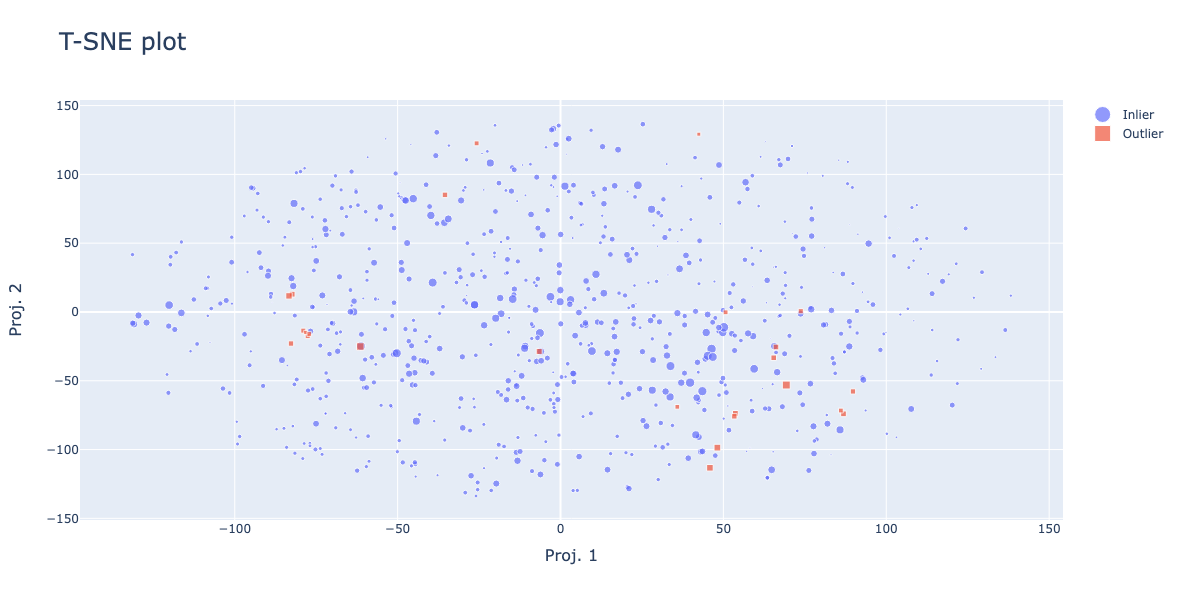

In [140]:
create_plotly_OOD_tsne(df_tsne_metrics_sub,model='', title = 'T-SNE plot',\
                       colors_column_name = 'predicted_outliers_st',\
                       error_column_name = 'min_mean_mpjpe', outlier_column_name= 'predicted_outliers')


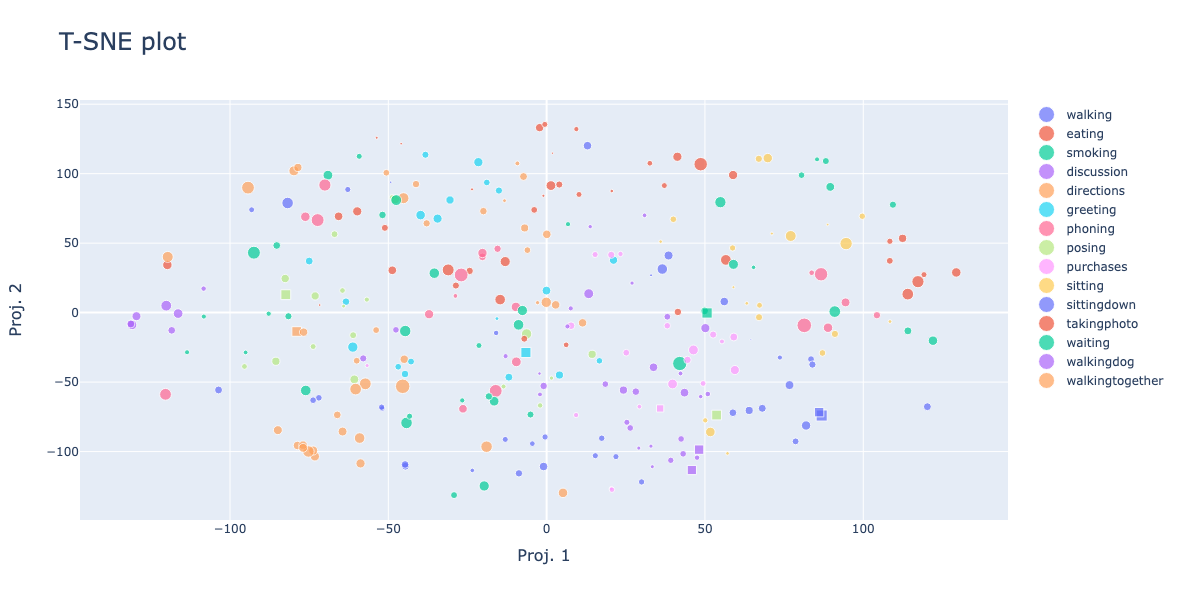

In [144]:
create_plotly_OOD_tsne(df_tsne_metrics_sub,model='', title = 'T-SNE plot',\
                       colors_column_name = 'action',\
                       error_column_name = 'min_mean_mpjpe', outlier_column_name= 'predicted_outliers')
